In [1]:
"""
In this notebook we convert a radar file to cartesian...
"""

'\nIn this notebook we convert a radar file to cartesian...\n'

In [2]:
import pyart as pyart
import cartopy.crs as ccrs
import pyproj
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import glob
import os
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [10]:
data_folder = "subic_p/01/09"
files = glob.glob(os.path.join(data_folder, "*"))
file = files[0]

In [12]:
radar_file = pyart.io.read_uf(file)

In [13]:
radar_file.info('full')

altitude:
	data: [528.]
	long_name: Altitude
	standard_name: Altitude
	units: meters
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: [187.5      188.5      189.5      ...  65.5       66.5       67.515625]
	units: degrees
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: [ 0.5  0.5  0.5 ... 19.5 19.5 19.5]
	units: degrees
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
corrected_reflectivity:
		data: [[13.5 28.5 32.5 ... -- -- --]
 [12.0 7.5 26.5 ... -- -- --]
 [11.5 26.5 16.5 ... -- -- --]
 ...
 [12.5 2.0 -4.5 ... -- -- --]
 [16.5 5.5 -4.0 ... -- -- --]
 [14.5 2.5 -2.0 ... -- -- --]]
		units: dBZ
		standard_name: corrected_equivalent_reflectivity_factor
		long_name: Corrected reflectivity


In [16]:
print(f"radar_file has nsweeps={radar_file.nsweeps}")
print(f"radar_file has fields: {[k for k in radar_file.fields.keys()]}")
print(f"radar_file as scan_type: {radar_file.scan_type}")

radar_file has nsweeps=14
radar_file has fields: ['corrected_reflectivity', 'velocity', 'spectrum_width']
radar_file as scan_type: ppi


## Convert radar to Grid

In [18]:
grid = pyart.map.grid_from_radars(radar_file, grid_shape=(1, 256, 256), grid_limits=((0., 20000,), (-240000., 240000.), (-240000, 240000.)))

In [20]:
help (grid)


Help on Grid in module pyart.core.grid object:

class Grid(builtins.object)
 |  Grid(time, fields, metadata, origin_latitude, origin_longitude, origin_altitude, x, y, z, projection=None, radar_latitude=None, radar_longitude=None, radar_altitude=None, radar_time=None, radar_name=None)
 |  
 |  A class for storing rectilinear gridded radar data in Cartesian coordinate.
 |  
 |  Refer to the attribute section for information on the parameters.
 |  
 |  To create a Grid object using legacy parameters present in Py-ART version
 |  1.5 and before, use :py:func:`from_legacy_parameters`,
 |  grid = Grid.from_legacy_parameters(fields, axes, metadata).
 |  
 |  Attributes
 |  ----------
 |  time : dict
 |      Time of the grid.
 |  fields : dict of dicts
 |      Moments from radars or other variables.
 |  metadata : dict
 |      Metadata describing the grid.
 |  origin_longitude, origin_latitude, origin_altitude : dict
 |      Geographic coordinate of the origin of the grid.
 |  x, y, z : dict, 

In [26]:
grid.fields.keys()
field = list(grid.fields.keys())[0]
print(f"field is {field}")

field is corrected_reflectivity


In [23]:
grid.radar_time

{'calendar': 'gregorian',
 'long_name': 'Time in seconds of the volume start for each radar',
 'units': 'seconds since 2019-01-09T18:50:02Z',
 'data': array([0])}

/Users/rolanvc/opt/anaconda3/envs/pyart/lib/python3.8/site-packages/pyart/graph/gridmapdisplay.py:217: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Mercator.
  warnings.warn(
/Users/rolanvc/opt/anaconda3/envs/pyart/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/rolanvc/opt/anaconda3/envs/pyart/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


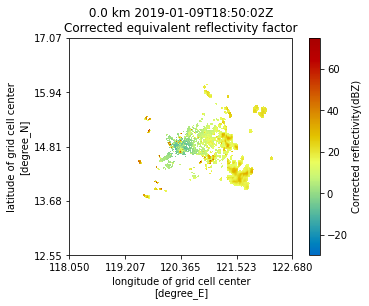

In [27]:
display =  pyart.graph.GridMapDisplay(grid)
display.plot_grid(field)

In [32]:
grid_copy = grid.fields['corrected_reflectivity']['data'].copy()
grid_np = np.array(grid_copy)
print(f"grid_np shape is: {grid_np.shape}")

grid_np shape is: (1, 256, 256)


/var/folders/4t/n36vk0wd60l2t3818jd4nqv80000gp/T/ipykernel_40870/2029122590.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm )


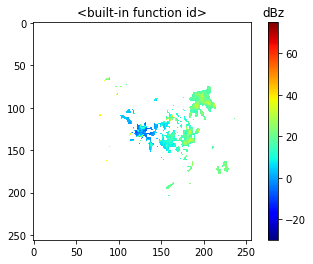

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
v_min = -30
v_max = 75
norm = plt.Normalize(v_min, v_max)
cmap = matplotlib.cm.get_cmap('jet')
sm = matplotlib.cm.ScalarMappable(norm = norm, cmap = cmap)
sm.set_array([])

cbar = fig.colorbar(sm )
cbar.ax.set_title("dBz")
ax.set_title(id)
ax.imshow(grid_np[0], cmap = 'jet', vmin = v_min, vmax = v_max)

# Part 2


In this part, we want to how different converting a radar file using extract_sweep([x]) will differ from ploting a radar file with all sweeps.

In [44]:
import random
data_folder = "subic_p/01/09"
files = glob.glob(os.path.join(data_folder, "*"))
files_count = len(files)
print(f"There are {files_count} in the folder")
random_idx = random.randrange(files_count)
file = files[random_idx]
print(f"The file {file} has been selected.")

There are 111 in the folder
The file subic_p/01/09/20190109072002.uf has been selected.


## Open the file. There should be 14 sweeps.

In [45]:
radar_file = pyart.io.read_uf(file)
print(f"radar_file has {radar_file.nsweeps} sweeps.")
print(f"radar_file has fields {[f for f in radar_file.fields.keys()]} sweeps.")


radar_file has 14 sweeps.
radar_file has fields ['corrected_reflectivity', 'velocity', 'spectrum_width'] sweeps.


In [50]:
radar_grid = pyart.map.grid_from_radars(radar_file, grid_shape=(1, 256, 256),
                                  grid_limits=((0., 20000,), (-240000., 240000.), (-240000, 240000.)))
grid_copy = radar_grid.fields['corrected_reflectivity']['data'].copy()
grid_np = np.array(grid_copy)
print(f"grid_np has shape {grid_np.shape}.")

grid_np has shape (1, 256, 256).


In [57]:
def plot_grid( grid_data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    v_min = -30
    v_max = 75
    norm = plt.Normalize(v_min, v_max)
    cmap = matplotlib.cm.get_cmap('jet')
    sm = matplotlib.cm.ScalarMappable(norm = norm, cmap = cmap)
    sm.set_array([])

    #cbar = fig.colorbar(sm )
    cbar.ax.set_title("dBz")
    ax.set_title(id)
    ax.imshow(grid_data, cmap = 'jet', vmin = v_min, vmax = v_max)

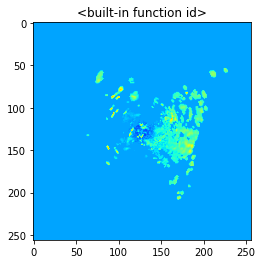

In [58]:
plot_grid(grid_np[0])


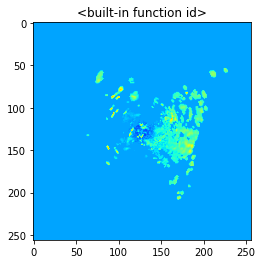

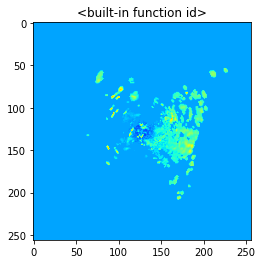

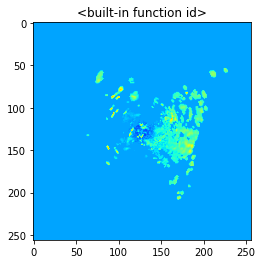

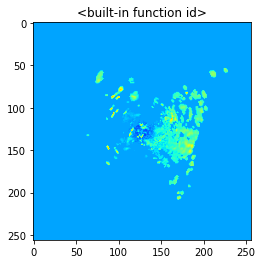

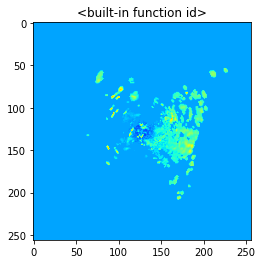

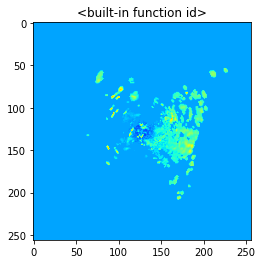

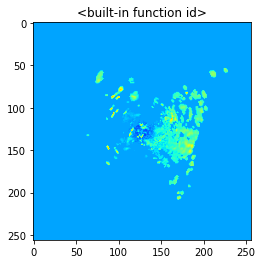

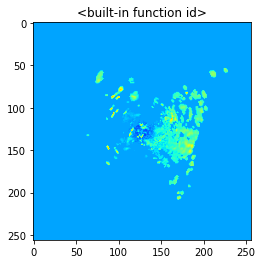

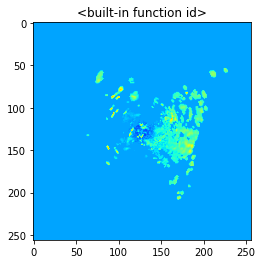

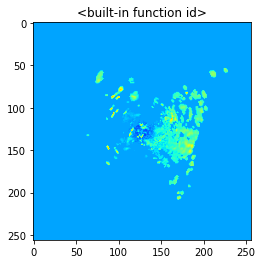

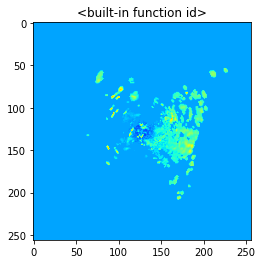

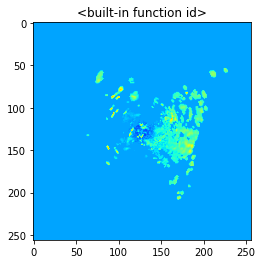

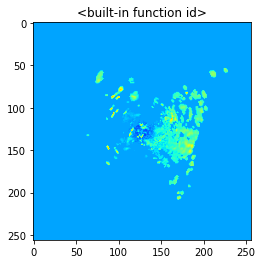

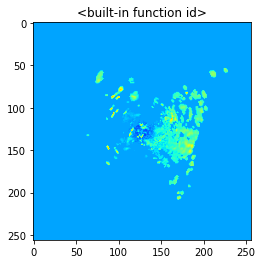

In [61]:
for i in range(radar_file.nsweeps):
    radar_at_sweep_i = radar_file.extract_sweeps([i]) # extract each sweep into its own radar object.
    radar_grid_sweep_i = pyart.map.grid_from_radars(radar_file, grid_shape=(1, 256, 256),
                                            grid_limits=((0., 20000,), (-240000., 240000.), (-240000, 240000.)))
    grid_copy_i = radar_grid_sweep_i.fields['corrected_reflectivity']['data'].copy()
    grid_np_i = np.array(grid_copy_i)
    plot_grid(grid_np_i[0])

# Conclusion
Extracting each sweep from the radar file doesnt really do anything...